# Notebook con los análisis utilizando los datos limpios.



In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline




In [21]:
heart_df=pd.read_csv("./datos_limpiados.csv")
heart_df.head()

,Unnamed: 0,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [22]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3749 non-null   int64  
 1   Sex_male         3749 non-null   int64  
 2   age              3749 non-null   int64  
 3   currentSmoker    3749 non-null   int64  
 4   cigsPerDay       3749 non-null   float64
 5   BPMeds           3749 non-null   float64
 6   prevalentStroke  3749 non-null   int64  
 7   prevalentHyp     3749 non-null   int64  
 8   diabetes         3749 non-null   int64  
 9   totChol          3749 non-null   float64
 10  sysBP            3749 non-null   float64
 11  diaBP            3749 non-null   float64
 12  BMI              3749 non-null   float64
 13  heartRate        3749 non-null   float64
 14  glucose          3749 non-null   float64
 15  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 468.8 KB


#  Análisis exploratorio

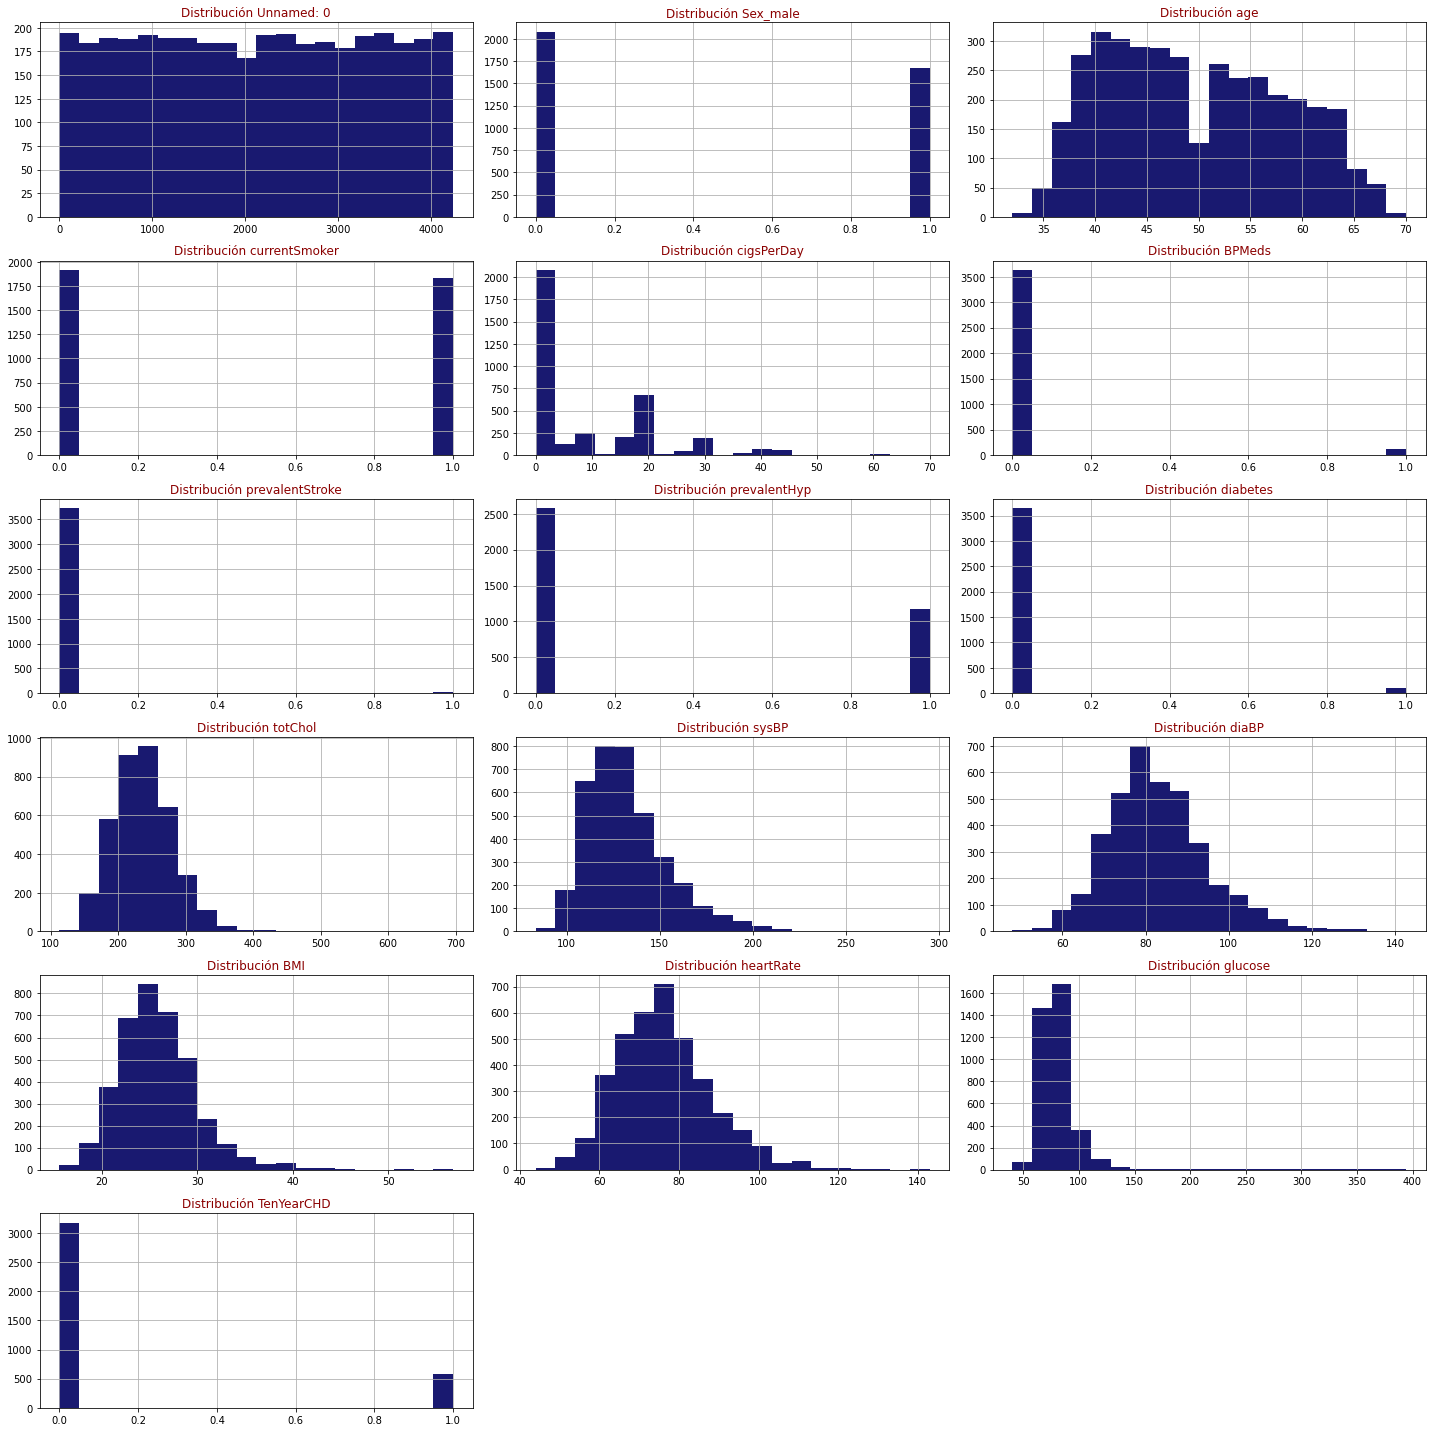

In [23]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title("Distribución "+feature,color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [24]:
heart_df.TenYearCHD.value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

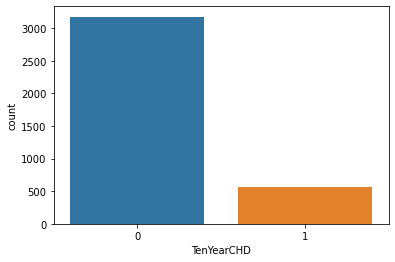

In [25]:
sn.countplot(x='TenYearCHD',data=heart_df)

Hay 3177 pacientes sin enfermedad cardiaca y 572 pacientes con riesgo de padecer una enfermedad al corazón.


In [ ]:
sn.pairplot(data=heart_df)

In [ ]:
heart_df.describe()

# Regresión Logística 

La regresión logística es un tipo de análisis de regresión que se utilizaremos para predecir el resultado de la variable objetivo que en nuestro caso es TenYearCHD.

In [28]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()


,const,Unnamed: 0,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [29]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377106
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3733
Method:                           MLE   Df Model:                           15
Date:                Sat, 08 Oct 2022   Pseudo R-squ.:                  0.1172
Time:                        21:51:48   Log-Likelihood:                -1413.8
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 1.104e-70
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.5779      0.692    -12.398      0.000      -9.934      -7.222
Unnamed: 0      -3.256e-05   3.91e-05     -0.833      0.405      -0.000    4.41e-05
Sex_male            0.5776      0.108      5.371      0.000       0.367       0.788
age                 0.0640      0.007      9.788      0.000       0.051       0.077
currentSmoker       0.0726      0.155      0.469      0.639      -0.230       0.376
cigsPerDay          0.0184      0.006      3.001      0.003       0.006       0.030
BPMeds              0.1524      0.232      0.656      0.512      -0.303       0.608
prevalentStroke     0.7340      0.490      1.499      0.134      -0.226       1.694
prevalentHyp        0.2183      0.136      1.600      0.110      -0.049       0.486
diabetes            0.0116      0.312      0.037      0.970      -0.600       0.624
totChol             0.0022      0.001      2.068      0.039       0.000       0.004
sysBP               0.0153      0.004      4.063      0.000       0.008       0.023
diaBP              -0.0039      0.006     -0.618      0.536      -0.016       0.009
BMI                 0.0102      0.013      0.815      0.415      -0.014       0.035
heartRate          -0.0022      0.004     -0.521      0.602      -0.010       0.006
glucose             0.0076      0.002      3.410      0.001       0.003       0.012
===================================================================================
"""

Los resultados anteriores muestran algunos de los variables con un valor de P superior al alfa preferido (5%) y, por lo tanto, muestran una relación estadísticamente significativa baja con la probabilidad de enfermedad cardíaca. El enfoque de eliminación hacia atrás se usa aquí para eliminar los atributos con el valor P más alto uno a la vez, seguido de la ejecución de la regresión repetidamente hasta que todos los atributos tengan valores P inferiores a 0,05.

## Enfoque del P-value

In [30]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Tomamos del dataset la variable dependiente y una lista con nombres de la columnas, 
    ejecutando la regresión eliminando repetidaente la caracteristica con el valor mas alto. 
    El P-value por encima del alfa uno a la vez y devuelve un resumen con todos los P-values bajo el alfa."""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)


In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Sat, 08 Oct 2022   Pseudo R-squ.:                  0.1148
Time:                        21:51:49   Log-Likelihood:                -1417.6
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.548e-76
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1211      0.468    -19.491      0.000     -10.038      -8.204
Sex_male       0.5813      0.105      5.521      0.000       0.375       0.788
age            0.0654      0.006     10.330      0.000       0.053       0.078
cigsPerDay     0.0197      0.004      4.803      0.000       0.012       0.028
totChol        0.0023      0.001      2.099      0.036       0.000       0.004
sysBP          0.0174      0.002      8.166      0.000       0.013       0.022
glucose        0.0076      0.002      4.573      0.000       0.004       0.011
==============================================================================
"""

## Interpretación de los resultados

In [32]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

            CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const           0.000044       0.000274    0.000109   0.000
Sex_male        1.454877       2.198166    1.788313   0.000
age             1.054409       1.080897    1.067571   0.000
cigsPerDay      1.011730       1.028128    1.019896   0.000
totChol         1.000150       1.004386    1.002266   0.036
sysBP           1.013299       1.021791    1.017536   0.000
glucose         1.004343       1.010895    1.007614   0.000


- El modelo ajustado muestra que, manteniendo todas las demás características constantes, la probabilidad de que se les iagnostique una enfermedad cardíaca para los hombres (sexo_masculino = 1) sobre la de las mujeres (sexo_masculino = 0) es exp(0,5813) = 1,788313. En términos de cambio porcentual, podemos decir que las probabilidades para los hombres son un 78,8 % más altas que las probabilidades para las mujeres.


- El coeficiente para la edad dice que, manteniendo todas las demás constantes, veremos un aumento del 7 % en las probabilidades de ser diagnosticado con CDH para un aumento de un año en la edad, ya que exp(0,0654) = 1,067571


- Del mismo modo, con cada cigarrillo adicional que uno fuma, hay un aumento del 2% en las probabilidades de CDH.


- Para el nivel de colesterol total y el nivel de glucosa no hay cambios significativos.


- Hay un aumento del 1,7 % en las probabilidades por cada unidad de aumento en la presión arterial sistólica.

## Dividir los datos para entrenar y probar el modelo.

In [34]:
import sklearn
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [35]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

### Evaluación del modelo

In [36]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8706666666666667

La precisión del modelo es 0.87

#### Matriz de confusión 

<AxesSubplot:>

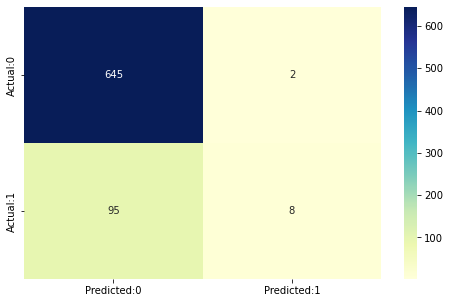

In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

La matriz de confusión muestra 645+8 = 653 predicciones correctas y 95+2 = 97 incorrectas 

Verdaderos positivos: 8

Verdaderos negativos: 645

Falsos positivos: 2 (error tipo I)

Falsos negativos: 95 (error tipo II)

### Probabilidades con pronóstico de 0 (enfermedad coronaria: no) y 1 (enfermedad coronaria: sí) para los datos de prueba con un umbral de clasificación predeterminado de 0,5 

In [57]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Probabilidad de no tener enfermedad al corazón (0)','Probabilidad de tener una enfermedad al corazón (1)'])
y_pred_prob_df.head()

,Probabilidad de no tener enfermedad al corazón (0),Probabilidad de tener una enfermedad al corazón (1)
0,0.776047,0.223953
1,0.545773,0.454227
2,0.831918,0.168082
3,0.887938,0.112062
4,0.920579,0.079421


### Curva ROC

Con la curva ROC determinaremos la exactitud de nuestro test, y poder determinar el área bajo la curva.

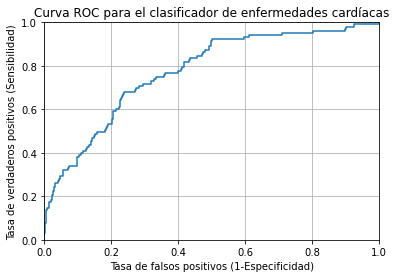

In [58]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para el clasificador de enfermedades cardíacas')
plt.xlabel('Tasa de falsos positivos (1-Especificidad)')
plt.ylabel('Tasa de verdaderos positivos (Sensibilidad)')
plt.grid(True)


Una forma común de visualizar las ventajas y desventajas de diferentes umbrales es usar una curva ROC, un gráfico de la tasa de verdaderos positivos (n.° de verdaderos positivos/n.° total de positivos) frente a la tasa de falsos positivos (n.° de falsos positivos/n.° total de negativos) para todas las opciones posibles de umbrales. Un modelo con una buena precisión de clasificación debería tener significativamente más positivos verdaderos que falsos positivos en todos los umbrales.

La posición óptima para la curva roc es hacia la esquina superior izquierda donde la especificidad y la sensibilidad están en niveles óptimos.

#### Area bajo la Curva ROC

El área bajo la curva ROC cuantifica la precisión de la clasificación del modelo; cuanto mayor sea el área, mayor será la disparidad entre los positivos verdaderos y falsos, y más fuerte será el modelo en la clasificación de los miembros del conjunto de datos de entrenamiento. Un área de 0,5 corresponde a un modelo que no funciona mejor que la clasificación aleatoria y un buen clasificador se mantiene lo más alejado posible de eso. Un área de 1 es ideal. Cuanto más cerca esté el AUC de 1, mejor.

In [55]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.7733077234735375

## Conclusiones 

- Todos los atributos seleccionados después del proceso de eliminación muestran valores de P inferiores al 5% y, por lo tanto, sugieren un papel importante en la predicción de enfermedades del corazón.


- Los hombres parecen ser más susceptibles a las enfermedades cardíacas que las mujeres. El aumento de la edad, la cantidad de cigarrillos fumados por día y la presión arterial sistólica también muestran mayores probabilidades de tener enfermedades cardíacas.


- El colesterol total no muestra cambios significativos en las probabilidades de cardiopatía coronaria. Esto podría deberse a la presencia de 'colesterol bueno (HDL) en la lectura de colesterol total. La glucosa también provoca un cambio muy insignificante en las probabilidades (0,2 %).


- El modelo predijo con una precisión de 0,87. El modelo es más específico que sensible.


- El Área bajo la curva ROC es 77,3, lo cual es algo satisfactorio. 


-  El modelo general podría mejorarse con más datos. 
